!pip install --user k-means-constrained==0.6.0

! pip install ortools==9.3.10459
import ortools
import ortools.graph.pywrapgraph   # cannot import name 'pywrapgraph' from 'ortools.graph' (unknown location)

!pip install statsmodels --upgrade  #scipy centered

import numpy
print(numpy.__version__)  1.22.4
import scipy
print(scipy.__version__) 1.10.1

pip install yellowbrick
pip install scikit-learn==0.24.1

In [19]:
from vyper.user import Model
import pandas as pd
from sklearn.utils import shuffle
from vyper.user.explorer import DataProfiler
from openpyxl import Workbook

import math
import numpy as np
from vyper.utils.tools import StatisticalTools as st
from sklearn.preprocessing import OrdinalEncoder
import scipy as stats
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from varclushi import VarClusHi
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from k_means_constrained import KMeansConstrained
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.cm import viridis

In [21]:
class Kmeans:

    def __init__(self, data):  # reading the data
        self.df = pd.read_csv(data)

    def elbow(self, minK, maxK, metric='distortion'):  # elbow plot for kmeans using distortion and inertia
        X = self.df
        model = KMeans()
        visualizer = KElbowVisualizer(model, k=(minK, maxK), metric=metric, timings=False)
        visualizer.fit(X)
        visualizer.show()
        return visualizer.elbow_value_

   # def Kmeans_elbow_plot(self, minK, maxK):  # elbow plot for kmeans using distortion and inertia
       # distortions = []
       # inertias = []
       # K = range(minK, maxK)
       # X = self.df

        #for k in K:
            # Building and fitting the model
           # kmeanModel = KMeans(n_clusters=k).fit(X)
            #kmeanModel.fit(X)
            #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                                #'euclidean'), axis=1)) / X.shape[0])
            #inertias.append(kmeanModel.inertia_)

        #plt.plot(K, distortions, 'bx-')
        #plt.xlabel('Values of K')
        #plt.ylabel('Distortion')
        #plt.title('The Elbow Method using Distortion')
        #plt.show()

        #plt.plot(K, inertias, 'bx-')
        #plt.xlabel('Values of K')
        #plt.ylabel('Inertia')
        #plt.title('The Elbow Method using Inertia')
        #plt.show()

    # @staticmethod
    # def get_nature(x, y):
    #     #direction
    #     dydx = np.gradient(y, x)
    #     if dydx[-1] > 0:
    #         direction = "increasing"
    #     elif dydx[-1] < 0:
    #         direction = "decreasing"
    #     else:
    #         direction = "constant"
    #
    #     #curve
    #     coefficients = np.polyfit(x, y, 2)
    #     if coefficients[0] > 0:
    #         curve = "convex"
    #     elif coefficients[0] < 0:
    #         curve = "concave"
    #     else:
    #         curve = "neither convex nor concave"
    #
    #     return direction, curve
    #
    # def find_optimal_k(self, minK, maxK):
    #     distortions = []
    #     inertias = []
    #     K = range(minK, maxK + 1)
    #     X = self.df
    #
    #     for k in K:
    #         # Building and fitting the model
    #         kmeanModel = KMeans(n_clusters=k).fit(X)
    #         kmeanModel.fit(X)
    #         distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
    #                                             'euclidean'), axis=1)) / X.shape[0])
    #         inertias.append(kmeanModel.inertia_)
    #
    #     direction1, curve1 = self.get_nature(K, distortions)
    #     direction2, curve2 = self.get_nature(K, inertias)
    #
    #     kn1 = KneeLocator(K, distortions, curve=curve1, direction=direction1)
    #     print("Optimal number of clusters using Distortion: ", kn1.knee)
    #
    #     kn2 = KneeLocator(K, inertias, curve=curve2, direction=direction2)
    #     print("Optimal number of clusters using Inertia: ", kn2.knee)

        # return kn1.knee, kn2.knee

    def sil_score(self, minK, maxK, metric='euclidean'):
        sil_scores = []
        for k in range(minK, maxK + 1):
            kmeans = KMeans(n_clusters=k).fit(self.df)
            labels = kmeans.labels_
            sil_scores.append(silhouette_score(self.df, labels, metric=metric))
        plt.plot(range(minK, maxK + 1), sil_scores)
        plt.xlabel("Number of cluster")
        plt.ylabel("Silhouette score")
        plt.show()
        print("Optimal number of clusters using silhouette score: ", minK + np.argmax(sil_scores))
        return minK + np.argmax(sil_scores)

    def kmeans_minClusterSize(self, cluster_num, multiple):

        # The 'multiple' parameter is used in this function to
        # calculate the minimum and maximum possible cluster sizes based on the size of the dataset and the desired
        # number of clusters. Specifically, the maximum cluster size is calculated as a fraction of the dataset size,
        # where the fraction is determined by the value of 'multiple' (i.e., maxSize = int(len(self.df) / (multiple *
        # cluster_num)) + 1). By adjusting the value of 'multiple', the user can control the range of cluster sizes
        # that are considered in the elbow plot. For example, setting 'multiple' to a higher value will result in a
        # smaller range of cluster sizes being considered, whereas setting 'multiple' to a lower value will result in
        # a larger range of cluster sizes being considered. Ultimately, the choice of 'multiple' will depend on the
        # specific dataset and the user's goals for clustering.

        minSize = 0
        maxSize = int(len(self.df) / (multiple * cluster_num)) + 1
        Size = range(minSize, maxSize)
        kmeanModel_minSize_list = []
        kmeanModel_minSize_out_list = []
        distortions = []
        inertias = []

        for k in Size:
            print("*** size: " + str(multiple * k), end=", ")
            # Building and fitting the model
            kmeanModel_minSize = KMeansConstrained(
                n_clusters=cluster_num,
                size_min=multiple * k,
                random_state=0)
            kmeanModel_minSize_out_list.append(kmeanModel_minSize.fit_predict(self.df))
            kmeanModel_minSize_list.append(kmeanModel_minSize)
            distortions.append(
                sum(np.min(cdist(self.df, kmeanModel_minSize.cluster_centers_, 'euclidean'), axis=1)) / self.df.shape[
                    0])
            inertias.append(kmeanModel_minSize.inertia_)

        plt.plot(Size, distortions, 'bx-')
        plt.xlabel('Values of Size')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method using Distortion for Minimum Size Selection,Cluster_Num=' + str(cluster_num))
        plt.show()

        plt.plot(Size, inertias, 'bx-')
        plt.xlabel('Values of Size')
        plt.ylabel('Inertia')
        plt.title('The Elbow Method using Inertia for Minimum Size Selection,Cluster_Num=' + str(cluster_num))
        plt.show()

    def kmeans_maxClusterSize(self, cluster_num, multiple):

        # The 'multiple' parameter is used in this function to
        # calculate the minimum and maximum possible cluster sizes based on the size of the dataset and the desired
        # number of clusters. Specifically, the maximum cluster size is calculated as a fraction of the dataset size,
        # where the fraction is determined by the value of 'multiple' (i.e., maxSize = int(len(self.df) / (multiple *
        # cluster_num)) + 1). By adjusting the value of 'multiple', the user can control the range of cluster sizes
        # that are considered in the elbow plot. For example, setting 'multiple' to a higher value will result in a
        # smaller range of cluster sizes being considered, whereas setting 'multiple' to a lower value will result in
        # a larger range of cluster sizes being considered. Ultimately, the choice of 'multiple' will depend on the
        # specific dataset and the user's goals for clustering.

        minSize = int(len(self.df) / (multiple * cluster_num)) + 1
        maxSize = int(len(self.df) / multiple)
        Size = range(minSize, maxSize)
        kmeanModel_maxSize_list = []
        kmeanModel_maxSize_out_list = []
        distortions = []
        inertias = []
        for k in Size:
            print("*** size: " + str(multiple * k), end=", ")
            # Building and fitting the model
            kmeanModel_maxSize = KMeansConstrained(
                n_clusters=cluster_num,
                size_max=multiple * k,
                random_state=42)
            kmeanModel_maxSize_out_list.append(kmeanModel_maxSize.fit_predict(self.df))
            kmeanModel_maxSize_list.append(kmeanModel_maxSize)
            distortions.append(
                sum(np.min(cdist(self.df, kmeanModel_maxSize.cluster_centers_, 'euclidean'), axis=1)) / self.df.shape[
                    0])
            inertias.append(kmeanModel_maxSize.inertia_)

        plt.plot(Size, distortions, 'bx-')
        plt.xlabel('Values of Size')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method using Distortion for Maximum Size Selection,Cluster_Num=' + str(cluster_num))
        plt.show()

        plt.plot(Size, inertias, 'bx-')
        plt.xlabel('Values of Size')
        plt.ylabel('Inertia')
        plt.title('The Elbow Method using Inertia for Maximum Size Selection,Cluster_Num=' + str(cluster_num))
        plt.show()

    # added the below three functions to the class
    def kmeans(self, n_clusters, min_size, max_size):
        kmeanModel = KMeansConstrained(
            n_clusters=n_clusters,
            size_min=min_size,
            size_max=max_size,
            random_state=42)
        clusters = kmeanModel.fit_predict(self.df)
        return clusters

    def pca(self, clusters, n_components=2):
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(self.df)
        principalComponents = pd.DataFrame(data=principalComponents, index=self.df.index, columns=['PC1', 'PC2'])
        principalComponents['cluster'] = clusters
        return principalComponents

    @staticmethod
    def scatter_plot(principalComponents):
        plt.scatter(principalComponents['PC1'], principalComponents['PC2'], c=principalComponents['cluster'],cmap=viridis)
        plt.colorbar()
        plt.show()

In [22]:
kmeans = Kmeans('maurices_oc_preprocessed.csv')

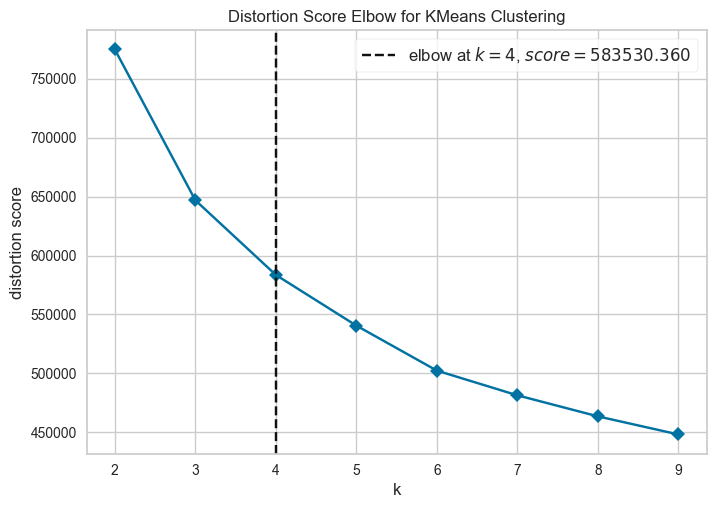

In [23]:
k_n=kmeans.elbow(2, 10,)

In [24]:
# kmeans.Kmeans_elbow_plot(2, 10)

In [25]:
# dis, ine = kmeans.find_optimal_k1(2, 10)

In [26]:
clus = kmeans.kmeans(k_n, 5000, 30000)

In [27]:
pca = kmeans.pca(clus)

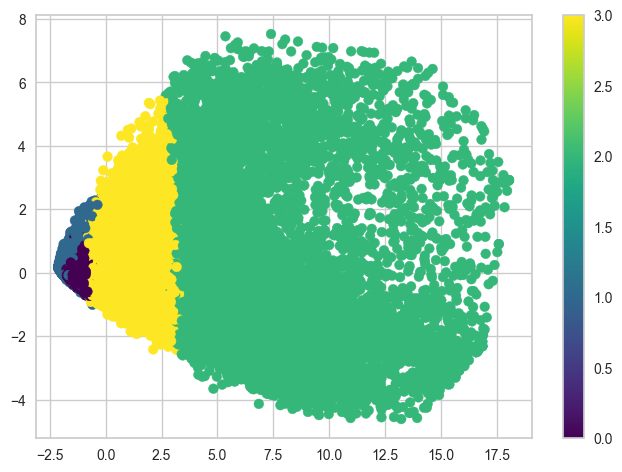

In [28]:
kmeans.scatter_plot(pca)